In [8]:
import pandas as pd
import numpy as np

# Clean Up Data

To retrieve browser data go to `~/Library/Application Support/Google/Chrome/Default` and execute the following command

```bash
sqlite3 History "select datetime(last_visit_time/1000000-11644473600,'unixepoch'),url from  urls order by last_visit_time desc" > ~/hist.txt
```

Read data from file and convert to Pandas `DataFrame`

In [9]:
with open('hist.txt') as f:
    content = f.readlines()
raw_data = [line.split('|', 1) for line in [x.strip() for x in content]]

print(raw_data[1])
data = pd.DataFrame(raw_data, columns=['datetime', 'url'])

data.head(1)

['2017-11-19 22:21:15', 'https://www.coursera.org/learn/big-data-management#syllabus']


,datetime,url
0,2017-11-19 22:21:56,https://www.coursera.org/learn/big-data-machin...


Convert datetime string to Pandas `DateTime`

In [10]:
data.datetime = pd.to_datetime(data.datetime)

In [11]:
data.datetime[0]

Timestamp('2017-11-19 22:21:56')

Remove all information from the URL, leaving only the domain/subdomain:

In [12]:
from urllib.parse import urlparse
parser = lambda u: urlparse(u).netloc
data.url = data.url.apply(parser)
data.head(1)

,datetime,url
0,2017-11-19 22:21:56,www.coursera.org


# Analyzing the Data

## Most visited sites

Generate list of top sites sorted by frequency

In [16]:
# Aggregate domain entries
site_frequencies = data.url.value_counts().to_frame()
# Make the domain a column
site_frequencies.reset_index(level=0, inplace=True)
# Rename columns to appropriate names
site_frequencies.columns = ['domain', 'count']
# Display top 10
site_frequencies.head(10)

,domain,count
0,www.google.es,1306
1,fisheye.tuenti.io,676
2,mail.google.com,555
3,docs.google.com,478
4,www.coursera.org,320
5,github.com,302
6,localhost:6006,252
7,www.google.com,218
8,www.amazon.es,178
9,stackoverflow.com,154


Plot it in a chart

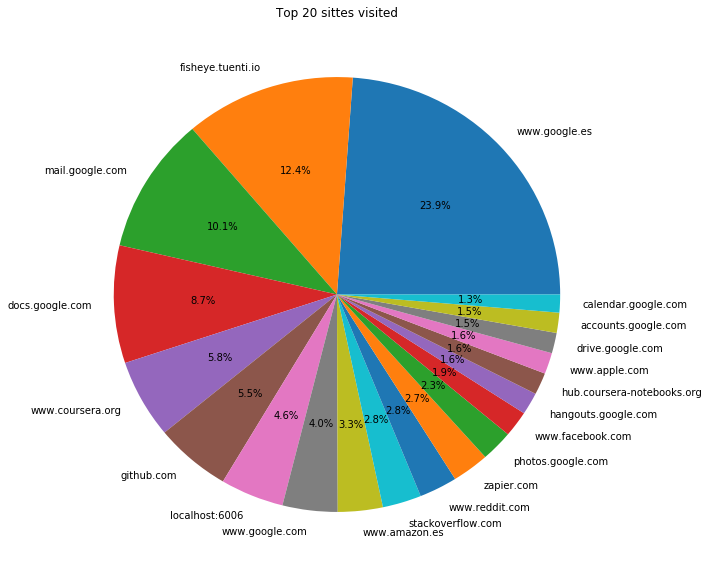

In [21]:
import matplotlib.pyplot as plt
topN = 20
plt.figure(1, figsize=(10, 10))
plt.title('Top {} sittes visited'.format(topN))
pie_data = site_frequencies['count'].head(topN).tolist()
pie_labels = site_frequencies['domain'].head(topN).tolist()
plt.pie(pie_data, autopct='%1.1f%%', labels=pie_labels)
plt.show()